# PROBLEM STATEMENT

To write a classifier that predicts wether a text is describing a COMPANY, an EVENT or a NEWS with sample file sample.csv which contains around 800 texts already classified

# STEP #1: Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the data using pandas dataframe
df = pd.read_csv('sample.csv')

In [3]:
df.head()

,class,text
0,EVENT,The Conference The Conference Start About Spea...
1,EVENT,Home - Agile Australia 19 Home - Agile Austral...
2,EVENT,BankTechAsia – Where Banking Meets Technology ...
3,EVENT,Business Transformation & Operational Excellen...
4,EVENT,"GFIA Abu Dhabi 2020 - In 2020, GFIA will be th..."


In [4]:
df.tail()

,class,text
792,COMPANY,TRIOPTICS - TRIOPTICS TRIOPTICS - TRIOPTICS Ne...
793,COMPANY,High-end Laser Systems for Scientific and Indu...
794,COMPANY,Standa Standa Continue browsing View Wishlist ...
795,COMPANY,"Precitec Group - Lasermaterialbearbeitung, Las..."
796,COMPANY,World Leader in Laser Wire Marking & Stripping...


# STEP #2: Explore Dataset

In [5]:
# Count the number of each cateory

event = df[df['class']=='EVENT']
news = df[df['class']=='NEWS']
company = df[df['class']=='COMPANY']

In [6]:
# Count the number of each category
print("Total =", len(df))

print("Number of event =", len(event))
print("Percentage of event =", 1.*len(event)/len(df)*100.0, "%")
 
print("Number of news =", len(news))
print("Percentage of news =", 1.*len(news)/len(df)*100.0, "%")
 
print("Number of company =", len(company))
print("Percentage of news =", 1.*len(company)/len(df)*100.0, "%")


Total = 797
Number of event = 285
Percentage of event = 35.75909661229611 %
Number of news = 233
Percentage of news = 29.234629861982437 %
Number of company = 279
Percentage of news = 35.006273525721454 %


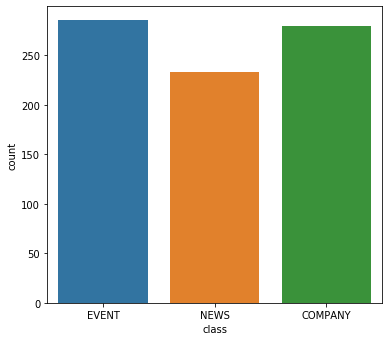

In [7]:
# Check if the dataset is unbalanced
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'class', data=df)

# STEP #3: Feature Engineering

- Text Cleaning: remove special characters, upper/lower cases, prossessive pronouns, punctuation signs, set stop words
- Label Coding: EVENT (0), NEWS (1), COMPANY (2)

In [8]:
#import libaries
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [9]:
#remove special characters
df['text_1'] = df['text'].str.replace("|", " ")

In [10]:
#remove upper cases
df['text_2'] = df['text_1'].str.lower()

In [11]:
# removing punctuation signs
punctuation_signs = list("?:!.,;-")
df['text_3'] = df['text_2']

for punct_sign in punctuation_signs:
    df['text_3'] = df['text_2'].str.replace(punct_sign, '')

In [12]:
# removing possessive pronouns
df['text_4'] = df['text_3'].str.replace("'s'", "")

In [13]:
# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolezhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))

In [15]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
df['text_5'] = df['text_4']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['text_5'] = df['text_5'].str.replace(regex_stopword, '')

In [17]:
df.head()

,class,text,text_1,text_2,text_3,text_4,text_5
0,EVENT,The Conference The Conference Start About Spea...,The Conference The Conference Start About Spea...,the conference the conference start about spea...,the conference the conference start about spea...,the conference the conference start about spea...,conference conference start speakers progra...
1,EVENT,Home - Agile Australia 19 Home - Agile Austral...,Home - Agile Australia 19 Home - Agile Austral...,home - agile australia 19 home - agile austral...,home agile australia 19 home agile australia...,home agile australia 19 home agile australia...,home agile australia 19 home agile australia...
2,EVENT,BankTechAsia – Where Banking Meets Technology ...,BankTechAsia – Where Banking Meets Technology ...,banktechasia – where banking meets technology ...,banktechasia – where banking meets technology ...,banktechasia – where banking meets technology ...,banktechasia – banking meets technology bankt...
3,EVENT,Business Transformation & Operational Excellen...,Business Transformation & Operational Excellen...,business transformation & operational excellen...,business transformation & operational excellen...,business transformation & operational excellen...,business transformation & operational excellen...
4,EVENT,"GFIA Abu Dhabi 2020 - In 2020, GFIA will be th...","GFIA Abu Dhabi 2020 - In 2020, GFIA will be th...","gfia abu dhabi 2020 - in 2020, gfia will be th...","gfia abu dhabi 2020 in 2020, gfia will be the...","gfia abu dhabi 2020 in 2020, gfia will be the...","gfia abu dhabi 2020 2020, gfia largest ag..."


In [18]:
df.drop(['text'], axis=1, inplace=True)

In [19]:
df.drop(['text_1'], axis=1, inplace=True)

In [20]:
df.drop(['text_2'], axis=1, inplace=True)

In [21]:
df.drop(['text_3'], axis=1, inplace=True)

In [22]:
df.drop(['text_4'], axis=1, inplace=True)

In [23]:
df.head()

,class,text_5
0,EVENT,conference conference start speakers progra...
1,EVENT,home agile australia 19 home agile australia...
2,EVENT,banktechasia – banking meets technology bankt...
3,EVENT,business transformation & operational excellen...
4,EVENT,"gfia abu dhabi 2020 2020, gfia largest ag..."


In [24]:
# Label Coding
class_codes = {
    'EVENT': 0,
    'NEWS': 1,
    'COMPANY': 2
}

In [25]:
# Category mapping
df['class_code'] = df['class']
df = df.replace({'class_code': class_codes})

In [26]:
df.head()

,class,text_5,class_code
0,EVENT,conference conference start speakers progra...,0
1,EVENT,home agile australia 19 home agile australia...,0
2,EVENT,banktechasia – banking meets technology bankt...,0
3,EVENT,business transformation & operational excellen...,0
4,EVENT,"gfia abu dhabi 2020 2020, gfia largest ag...",0


# STEP#4: Model Training
- Use TF-IDF medthod
- 85% data as training, 15% as testing
- ngram_range: consider both unigrams and bigrams.
- max_df: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold
- min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
- max_features: If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df['text_5'], 
                                                    df['class_code'], 
                                                    test_size=0.15, 
                                                    random_state=12)

In [28]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.0
max_features = 300

In [29]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(677, 300)
(120, 300)


In [30]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, class_id in sorted(class_codes.items()):
    features_chi2 = chi2(features_train, labels_train == class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' class:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'COMPANY' class:
  . Most correlated unigrams:
. 2019
. products
. de
. careers
. solutions
  . Most correlated bigrams:
. news releases
. contact us

# 'EVENT' class:
  . Most correlated unigrams:
. agenda
. 2020
. speakers
. conference
. 2019
  . Most correlated bigrams:
. speakers agenda
. buy tickets

# 'NEWS' class:
  . Most correlated unigrams:
. try
. results
. daily
. search
. olam
  . Most correlated bigrams:
. tikkun olam
. news releases



# STEP#5: MODEL TESTING

In [31]:
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit

In [32]:
print(features_train.shape)
print(features_test.shape)

(677, 300)
(120, 300)


In [33]:
# What hyperparameters the model has

svc_0 =svm.SVC(random_state=12)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 12,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [34]:
# Tune the following ones:

# C: Penalty parameter C of the error term.
# kernel: Specifies the kernel type to be used in the algorithm.
# gamma: Kernel coefficient.
# degree: Degree of the polynomial kernel function.

# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


In [35]:
# Perform the Random Search:
# Create the base model to tune
svc = svm.SVC(random_state=12)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=12)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=12, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   pre_dispatch='2*n_jobs', rando

In [36]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'probability': True, 'kernel': 'poly', 'gamma': 100, 'degree': 2, 'C': 0.0001}

The mean accuracy of a model with these hyperparameters is:
0.9320531757754801


In [37]:
# Create the parameter grid based on the results of random search 
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

# Create a base model
svc = svm.SVC(random_state=12)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 12)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=12, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=12, shrinking=True,
                           tol=0.001, verbose=False),
             iid='...one,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['linear'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1], 'degree': [3, 4, 5],
                          'kernel': ['poly'], 'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1],
                          'gamma': [1, 10, 100], 'kernel': ['rbf'],
                          'probability': [True]}],
             pre_

In [38]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.1, 'kernel': 'linear', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
0.875


In [39]:
best_svc = random_search.best_estimator_

In [40]:
best_svc

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=100, kernel='poly',
    max_iter=-1, probability=True, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
best_svc.fit(features_train, labels_train)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=100, kernel='poly',
    max_iter=-1, probability=True, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [42]:
svc_pred = best_svc.predict(features_test)

In [43]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_svc.predict(features_train)))

The training accuracy is: 
0.9955686853766618


In [44]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, svc_pred))

The test accuracy is: 
0.925


In [45]:
# Classification report
print("Classification report")
print(classification_report(labels_test,svc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.94      0.92      0.93        36
           2       0.88      0.93      0.90        40

    accuracy                           0.93       120
   macro avg       0.93      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120



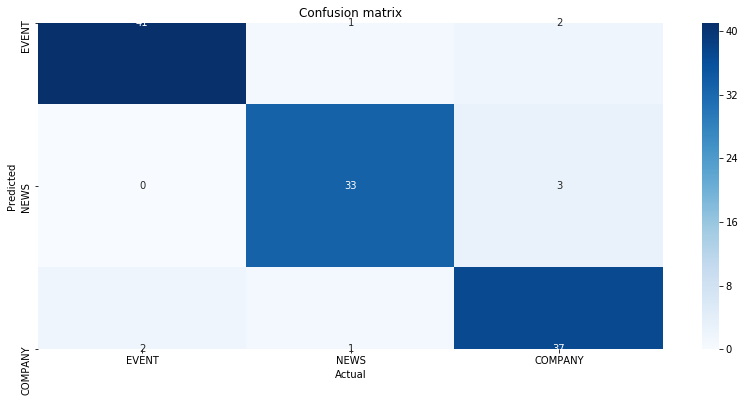

In [46]:
aux_df = df[['class', 'class_code']].drop_duplicates().sort_values('class_code')
conf_matrix = confusion_matrix(labels_test, svc_pred)
plt.figure(figsize=(14,6))
sns.heatmap(conf_matrix, 
            annot=True,            
            xticklabels=aux_df['class'].values, 
            yticklabels=aux_df['class'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [47]:
best_svc.fit(features_train, labels_train)
accuracy_score(labels_test, best_svc.predict(features_test))

0.925

In [48]:
# create a dataset with a model summary to compare models
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(labels_train, best_svc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, svc_pred)
}

df_models_svc = pd.DataFrame(d, index=[0])

In [49]:
df_models_svc

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,0.995569,0.925


In [50]:
with open('best_svc.pickle', 'wb') as output:
    pickle.dump(best_svc, output)
    
with open('df_models_svc.pickle', 'wb') as output:
    pickle.dump(df_models_svc, output)